In [3]:
import pandas as pd
from utils import pathlist

In [11]:
dir = 'D:/DSL/EDA/Data/Closed_schools/시도교육청_폐교목록_전국단위.csv'

df = pd.read_csv(dir, encoding = 'utf-8')

mask = (df['폐교연도'] >= 2013) & (df['급별'] == '고')

filtered = df[mask]

filtered = filtered.drop(['지역교육청', '급별', '활용현황', '주소'], axis = 1)

filtered.to_csv(dir.replace('.csv', '_전처리') + '.csv', sep = ',', encoding = 'cp949')

In [44]:
data = pd.read_csv('D:/DSL/EDA/Data/Overall_002.csv', encoding = 'cp949')
threshold = 0.9 * len(data)

data = data.loc[:,(data == 0).sum(axis = 0) <= threshold]
data = data.loc[:, (data == 1).sum(axis = 0) <= threshold]


values_remove = ['원천코드오류', '각종학교','고등공민학교', '공민학교']

filtered = data.loc[~data['학제유형명'].isin(values_remove)]
filtered = filtered.drop(['학교급명', '개방ID'], axis = 1)

filtered = filtered[filtered['학제유형명'].str.contains('고등학교', na=False)]

cols = ['조사년도', '시도명', '학교명', '유초중등학교개황_입학생수', '유초중등학교개황_정규교실수', '유초중등학교개황_학급수', '유초중등학교개황_졸업생수']

filtered = filtered[cols]

'''
filtered['학교_식별자'] = filtered['학교명'] + ' (' + filtered['시도명'] + ')'

filtered = filtered.drop(['학교명', '시도명'], axis = 1)

filtered.to_csv('D:/DSL/EDA/Data/school_name.csv', sep = ',', encoding = 'cp949')
'''

"\nfiltered['학교_식별자'] = filtered['학교명'] + ' (' + filtered['시도명'] + ')'\n\nfiltered = filtered.drop(['학교명', '시도명'], axis = 1)\n\nfiltered.to_csv('D:/DSL/EDA/Data/school_name.csv', sep = ',', encoding = 'cp949')\n"

In [45]:
filtered['학교_식별자'] = filtered['학교명'] + ' (' + filtered['시도명'] + ')'

# 데이터 변환
result = filtered.pivot_table(index='학교_식별자', columns='조사년도', values='유초중등학교개황_학급수')

index_dtype = result.index.dtype
columns_dtype = result.columns.dtype

# 숫자형 데이터에 대해서만 결측치 처리
result = result.fillna(0)

# 행(`index`)와 열(`columns`)의 데이터 타입 복구
result.index = result.index.astype(index_dtype)
result.columns = result.columns.astype(columns_dtype)

print(result)

# 결과 출력
result.to_csv('D:/DSL/EDA/Data/class_high.csv', sep = ',', encoding = 'cp949')


조사년도         2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  \
학교_식별자                                                                          
가곡고등학교 (강원)   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   
가락고등학교 (서울)  48.0  43.0  43.0  43.0  40.0  38.0  36.0  36.0  35.0  34.0  33.0   
가림고등학교 (인천)  38.0  37.0  37.0  37.0  37.0  37.0  37.0  36.0  36.0  35.0  35.0   
가야고등학교 (부산)  41.0  39.0  38.0  37.0  36.0  36.0  34.0  31.0  28.0  26.0  25.0   
가온고등학교 (경기)  30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0   
...           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
휘문고등학교 (서울)  48.0  47.0  46.0  44.0  43.0  41.0  40.0  40.0  40.0  39.0  42.0   
휘봉고등학교 (서울)   0.0   0.0   0.0   8.0  16.0  24.0  24.0  24.0  24.0  24.0  23.0   
흥덕고등학교 (경기)   0.0   5.0  14.0  24.0  26.0  27.0  27.0  28.0  28.0  28.0  28.0   
흥덕고등학교 (충북)  31.0  31.0  31.0  31.0  31.0  31.0  31.0  31.0  31.0  31.0  31.0   
흥진고등학교 (경기)  44.0  44.0  43.

### 폐교된 학교에 대한 데이터 불러오기

In [48]:
df = pd.read_csv('D:/DSL/EDA/Data/School_Year/시도교육청_폐교목록_전국단위_전처리_mk1.csv', encoding = 'cp949')

li = df['폐교명']

data = pd.read_csv('D:/DSL/EDA/Data/School_Year/school_name.csv', encoding = 'cp949')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35039 entries, 0 to 35038
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   조사년도            35039 non-null  int64 
 1   유초중등학교개황_입학생수   35039 non-null  int64 
 2   유초중등학교개황_정규교실수  35039 non-null  int64 
 3   유초중등학교개황_학급수    35039 non-null  int64 
 4   유초중등학교개황_졸업생수   35039 non-null  int64 
 5   학교_식별자          35039 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.6+ MB


In [49]:
integrate = None
for i in li:
    if integrate is None:
        integrate = data[data['학교_식별자'].str.contains(i)]
    else:
        new = data[data['학교_식별자'].str.contains(i)]
        integrate = pd.concat([integrate, new], axis = 0)

integrate.to_csv('D:/DSL/EDA/Data/School_Year/abolishment_mk1.csv', sep = ',', encoding = 'cp949')
integrate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 416 to 16023
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   조사년도            224 non-null    int64 
 1   유초중등학교개황_입학생수   224 non-null    int64 
 2   유초중등학교개황_정규교실수  224 non-null    int64 
 3   유초중등학교개황_학급수    224 non-null    int64 
 4   유초중등학교개황_졸업생수   224 non-null    int64 
 5   학교_식별자          224 non-null    object
dtypes: int64(5), object(1)
memory usage: 12.2+ KB


### 정규화, 단순선형회귀분석

In [93]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import LinearRegression

class ZeroIgnoringRegressor(BaseEstimator, RegressorMixin):
    def __init__(self):
        self.model = LinearRegression()

    def fit(self, X, y):
        # 0 값을 제외한 데이터로 학습
        mask = y != 0
        self.model.fit(X[mask], y[mask])
        return self

    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        # 0 값을 무시하고 R^2 계산
        mask = y != 0
        return self.model.score(X[mask], y[mask])


def normalize_by_school(group):
    max_students = group['유초중등학교개황_입학생수'].max()
    if max_students > 0:
        group['data_normalized'] = group['유초중등학교개황_입학생수'] / max_students
    else:
        group['data_normalized'] = group['유초중등학교개황_입학생수']  # 모든 값이 0인 경우
    return group



# 예제 데이터
data = pd.read_csv('D:/DSL/EDA/Data/School_Year/abolishment_mk1.csv', encoding = 'cp949')

data_normalized = data.groupby('학교_식별자').apply(normalize_by_school)

data_normalized = data_normalized.loc[data_normalized['조사년도'] < 2020]

X = data_normalized['조사년도'].values.reshape(-1, 1)
y = data_normalized['data_normalized'].values

# 사용자 정의 회귀 모델 사용
regressor = ZeroIgnoringRegressor()
regressor.fit(X, y)

# 예측
predicted = regressor.predict(X)

# 결과 출력
print("기울기:", regressor.model.coef_[0])
print("절편:", regressor.model.intercept_)

# 예측값 출력
print("예측값:", predicted)

tangent, y_axis = regressor.model.coef_[0], regressor.model.intercept_


기울기: -0.05003251906684366
절편: 101.39213024437352
예측값: [0.87679944 0.82676692 0.7767344  0.72670188 0.67666936 0.62663684
 0.57660432 0.52657181 0.47653929 0.87679944 0.82676692 0.7767344
 0.72670188 0.67666936 0.62663684 0.57660432 0.52657181 0.47653929
 0.42650677 0.37647425 0.87679944 0.82676692 0.7767344  0.72670188
 0.67666936 0.87679944 0.82676692 0.7767344  0.72670188 0.67666936
 0.62663684 0.57660432 0.52657181 0.47653929 0.87679944 0.82676692
 0.7767344  0.72670188 0.67666936 0.62663684 0.87679944 0.82676692
 0.7767344  0.72670188 0.67666936 0.62663684 0.57660432 0.52657181
 0.47653929 0.42650677 0.37647425 0.87679944 0.82676692 0.7767344
 0.72670188 0.67666936 0.62663684 0.57660432 0.52657181 0.47653929
 0.42650677 0.37647425 0.87679944 0.82676692 0.7767344  0.72670188
 0.67666936 0.62663684 0.57660432 0.52657181 0.87679944 0.82676692
 0.7767344  0.72670188 0.67666936 0.62663684 0.57660432 0.52657181
 0.47653929 0.87679944 0.82676692 0.7767344  0.72670188 0.67666936
 0.6266368

C:\Users\Monet\AppData\Local\Temp\ipykernel_13068\3082735171.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_normalized = data.groupby('학교_식별자').apply(normalize_by_school)


In [94]:
print(regressor.score(X,y))

0.3149507992471249


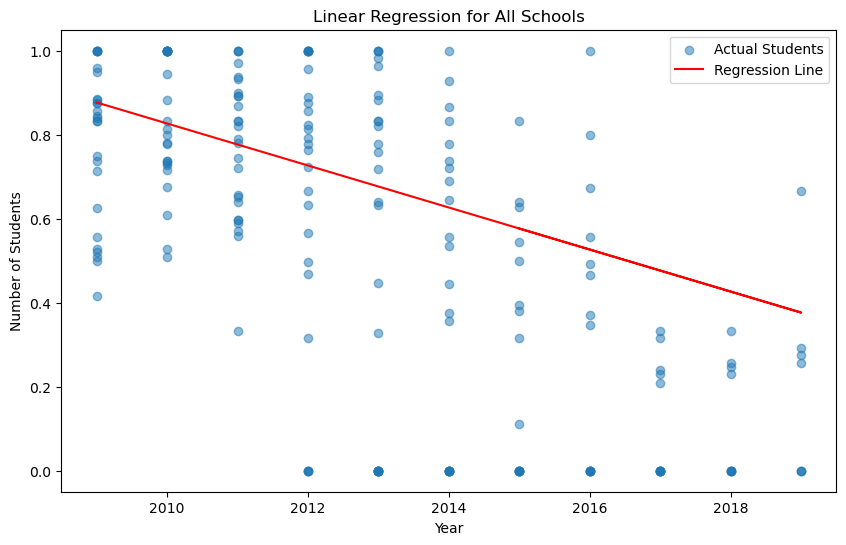

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(data_normalized['조사년도'], data_normalized['data_normalized'], alpha=0.5, label='Actual Students')
plt.plot(data_normalized['조사년도'], predicted, color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.title('Linear Regression for All Schools')
plt.legend()
plt.show()

In [96]:
from scipy.stats import pearsonr, spearmanr

# 독립 변수와 종속 변수
X = data_normalized['조사년도']
y = data_normalized['data_normalized']

# 피어슨 상관계수 및 p-value 계산
pearson_corr, pearson_p = pearsonr(X, y)
print(f"피어슨 상관계수: {pearson_corr:.4f}, p-value: {pearson_p:.4f}")

# 스피어만 상관계수 및 p-value 계산
spearman_corr, spearman_p = spearmanr(X, y)
print(f"스피어만 상관계수: {spearman_corr:.4f}, p-value: {spearman_p:.4f}")


피어슨 상관계수: -0.6382, p-value: 0.0000
스피어만 상관계수: -0.6158, p-value: 0.0000


### 전체 데이터에 대한 단순선형회귀분석

In [ ]:
whole = pd.read_csv('D:\DSL\EDA\Data\School_Year\high_cleared_long.csv', encoding = 'cp949')

data_normalized = whole.groupby('학교_식별자').apply(normalize_by_school)


X = data_normalized['조사년도'].values.reshape(-1, 1)
y = data_normalized['data_normalized'].values

# 사용자 정의 회귀 모델 사용
regressor = ZeroIgnoringRegressor()
regressor.fit(X, y)

# 예측
predicted = regressor.predict(X)

# 결과 출력
print("기울기:", regressor.model.coef_[0])
print("절편:", regressor.model.intercept_)

# 예측값 출력
print("예측값:", predicted)
print('R squared:', regressor.score(X,y))

tangent, y_axis = regressor.model.coef_[0], regressor.model.intercept_

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Monet\AppData\Local\Temp\ipykernel_13068\3478261401.py:1: SyntaxWarning: invalid escape sequence '\D'
  whole = pd.read_csv('D:\DSL\EDA\Data\School_Year\high_cleared_long.csv', encoding = 'cp949')


기울기: -0.029156506267964555
절편: 59.531753068739455
예측값: [0.95633198 0.92717547 0.89801896 ... 0.6064539  0.57729739 0.54814089]
R squared: 0.3927493475111381


C:\Users\Monet\AppData\Local\Temp\ipykernel_13068\3478261401.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_normalized = whole.groupby('학교_식별자').apply(normalize_by_school)


In [102]:
# 독립 변수와 종속 변수
X = data_normalized['조사년도']
y = data_normalized['data_normalized']

# 피어슨 상관계수 및 p-value 계산
pearson_corr, pearson_p = pearsonr(X, y)
print(f"피어슨 상관계수: {pearson_corr:.4f}, p-value: {pearson_p:.4f}")

# 스피어만 상관계수 및 p-value 계산
spearman_corr, spearman_p = spearmanr(X, y)
print(f"스피어만 상관계수: {spearman_corr:.4f}, p-value: {spearman_p:.4f}")

피어슨 상관계수: -0.6072, p-value: 0.0000
스피어만 상관계수: -0.6505, p-value: 0.0000


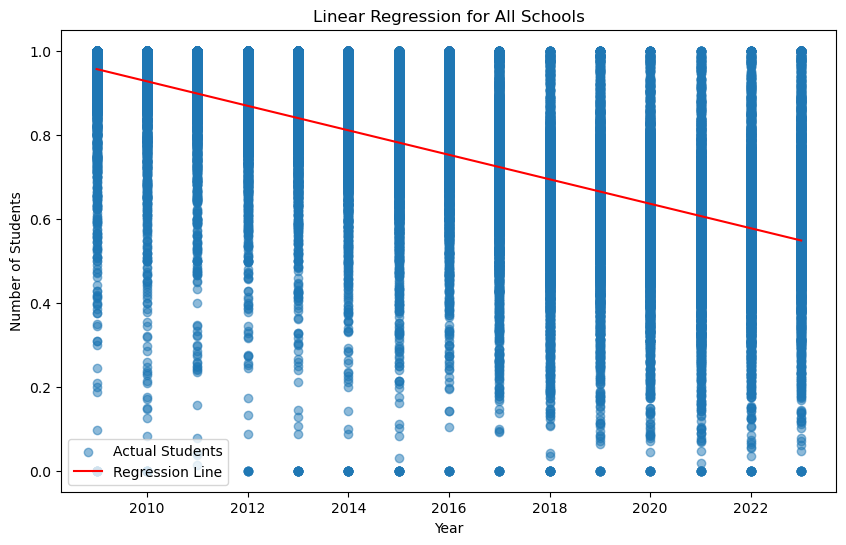

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data_normalized['조사년도'], data_normalized['data_normalized'], alpha=0.5, label='Actual Students')
plt.plot(data_normalized['조사년도'], predicted, color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.title('Linear Regression for All Schools')
plt.legend()
plt.show()

### 회귀 직선 기울기의 동질성 검정

#### 1. 데이터 라벨링

In [110]:
closed = pd.read_csv('D:/DSL/EDA/Data/School_Year/abolishment_mk1.csv', encoding = 'cp949')

li = list(set(closed['학교_식별자']))


whole = pd.read_csv('D:/DSL/EDA/Data/School_Year/high_cleared_long.csv', encoding = 'cp949')

whole['폐교 여부'] = whole['학교_식별자'].apply(lambda x: 1 if x in li else 0)

whole.to_csv('D:/DSL/EDA/Data/School_Year/high_cleared_long_mk1.csv', sep = ',', encoding = 'cp949')

#### 2. 회귀 직선 동질성 검정

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np


def normalize_by_school(group):
    max_students = group['유초중등학교개황_입학생수'].max()
    if max_students > 0:
        group['data_normalized'] = group['유초중등학교개황_입학생수'] / max_students
    else:
        group['data_normalized'] = group['유초중등학교개황_입학생수']  # 모든 값이 0인 경우
    return group


whole = pd.read_csv('D:/DSL/EDA/Data/School_Year/high_cleared_long_mk1.csv', encoding = 'cp949')

# 독립 변수, 집단 변수, 그리고 교호작용 항 추가
whole['교호'] = whole['조사년도'] * whole['폐교 여부']
data_normalized = whole.groupby('학교_식별자').apply(normalize_by_school)

# 종속 변수와 독립 변수 설정
X = data_normalized[['조사년도', '교호']]
y = data_normalized['data_normalized']

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        data_normalized   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                 1.087e+04
Date:                Mon, 27 Jan 2025   Prob (F-statistic):               0.00
Time:                        13:18:48   Log-Likelihood:                 14102.
No. Observations:               35039   AIC:                        -2.820e+04
Df Residuals:                   35036   BIC:                        -2.817e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.8879      0.405    147.790      0.0

C:\Users\Monet\AppData\Local\Temp\ipykernel_13068\2857522650.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_normalized = whole.groupby('학교_식별자').apply(normalize_by_school)


### Threshold value로 판단하는 폐교 가능성 여부

In [136]:
data = pd.read_csv('D:\DSL\EDA\Data\School_Year\high_cleared_long.csv', encoding = 'cp949')

mask = data['유초중등학교개황_입학생수'] == 0

data = data.loc[data['유초중등학교개황_입학생수'] != 0]
data = data.loc[data['조사년도'] < 2020]

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Monet\AppData\Local\Temp\ipykernel_13068\4121379446.py:1: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv('D:\DSL\EDA\Data\School_Year\high_cleared_long.csv', encoding = 'cp949')


In [139]:
def get_rows_with_slope_below_threshold(data, threshold):
    rows_below_threshold = []  # 조건을 만족하는 행을 저장할 리스트

    # 학교별로 그룹화
    grouped = data.groupby('학교_식별자')

    for school, group in grouped:
        # X와 y 준비 (연도와 입학생 수)
        X = group['조사년도'].values.reshape(-1, 1)
        y = group['data_normalized'].values

        # 최소 두 개 이상의 데이터가 있어야 회귀 가능
        if len(group) < 2:
            continue

        # 선형 회귀 모델 적합
        model = ZeroIgnoringRegressor()
        model.fit(X, y)
        slope = model.model.coef_[0]  # 기울기 추출

        # 기울기가 threshold보다 작으면 해당 행 추가
        if slope < threshold:
            rows_below_threshold.append(group)

    # 모든 조건을 만족하는 행들을 하나로 합치기
    return pd.concat(rows_below_threshold)

data_normalized = data.groupby('학교_식별자').apply(normalize_by_school)

data_normalized.to_csv('D:\DSL\EDA\Data/toy3.csv', sep = ',', encoding = 'cp949')  

threshold = -0.05  # 예: 감소량이 -1보다 작으면 반환

data = pd.read_csv('D:\DSL\EDA\Data/toy3.csv', encoding = 'cp949')


# 함수 실행
result = get_rows_with_slope_below_threshold(data, threshold)

li = list(set(result['학교_식별자']))

print(li)

<>:30: SyntaxWarning: invalid escape sequence '\D'
<>:34: SyntaxWarning: invalid escape sequence '\D'
<>:30: SyntaxWarning: invalid escape sequence '\D'
<>:34: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Monet\AppData\Local\Temp\ipykernel_13068\18924237.py:30: SyntaxWarning: invalid escape sequence '\D'
  data_normalized.to_csv('D:\DSL\EDA\Data/toy3.csv', sep = ',', encoding = 'cp949')
C:\Users\Monet\AppData\Local\Temp\ipykernel_13068\18924237.py:34: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv('D:\DSL\EDA\Data/toy3.csv', encoding = 'cp949')
C:\Users\Monet\AppData\Local\Temp\ipykernel_13068\18924237.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_normalized 

['김해분성여자고등학교 (경남)', '김제서고등학교 (전북)', '다운고등학교 (울산)', '심인고등학교 (대구)', '성지고등학교 (부산)', '대곡고등학교 (경남)', '덕수고등학교 (서울)', '함평골프고등학교 (전남)', '백화고등학교 (전북)', '누원고등학교 (서울)', '한마음고등학교 (충남)', '광양고등학교 (서울)', '부여정보고등학교 (충남)', '광일고등학교 (광주)', '사동고등학교 (경북)', '월계고등학교 (서울)', '성지여자고등학교 (경남)', '둔내고등학교 (강원)', '남원제일고등학교 (전북)', '도당고등학교 (경기)', '부평여자고등학교 (인천)', '신도고등학교 (서울)', '동작고등학교 (서울)', '삼산고등학교 (인천)', '배문고등학교 (서울)', '김해삼방고등학교 (경남)', '비금고등학교 (전남)', '청란여자고등학교 (대전)', '삼가고등학교 (경남)', '지산고등학교 (부산)', '곤양고등학교 (경남)', '옥과고등학교 (전남)', '과천여자고등학교 (경기)', '한국해양마이스터고등학교 (경북)', '내성고등학교 (부산)', '동명공업고등학교 (부산)', '혜화여자고등학교 (서울)', '동래고등학교 (부산)', '세명고등학교 (경북)', '완도금일고등학교 (전남)', '부산중앙여자고등학교 (부산)', '함열고등학교 (전북)', '세연고등학교 (부산)', '대전동신과학고등학교 (대전)', '인천산곡고등학교 (인천)', '순천여자고등학교 (전남)', '무학여자고등학교 (서울)', '효문고등학교 (서울)', '한성고등학교 (서울)', '원곡고등학교 (경기)', '남산고등학교 (부산)', '동의고등학교 (부산)', '부명고등학교 (경기)', '한국기술부사관고등학교 (전북)', '광신고등학교 (서울)', '서울항공비즈니스고등학교 (서울)', '개금고등학교 (부산)', '부개고등학교 (인천)', '남성여자고등학교 (부산)', '서천여자정보고등학교 (충남)', '김해임호고등학교 (경남)', '동국대학교사범대학부속금산고등학

### 폐교의 마지막 연도 학생 수 - 지역 인구 수의 비와 폐교 여부의 연관성에 대하여

In [4]:
## 학교의 도로명 주소와 학교 이름을 이을 것!
## 그러기 위해 일단 교명 + 도로명 주소로 된 csv 파일을 따로 저장.

location = pd.read_csv('D:/DSL/EDA/Data/location.csv', encoding = 'utf-8')

high = location.loc[location['학교급구분'] == '고등학교']
high = high[['학교명', '소재지도로명주소']]

high.to_csv('D:/DSL/EDA/Data/high_location.csv', sep = ',', encoding = 'cp949')

In [5]:
whole = pd.read_csv('D:/DSL/EDA/Data/School_Year/high_cleared_long_mk1.csv', encoding = 'cp949')

exceptions = ['전라북도', '전라남도', '경상북도', '경상남도', '충청북도', '충청남도']

# 식별자 컬럼 생성 (apply() 함수 사용)
def extract_identifier(address):
    prefix = address[:4]  # 앞 5글자 추출
    if prefix not in exceptions:
        return address[:2]  # 기본적으로 앞 2글자 반환 (예: "서울", "경기", "부산")
    else:
        return {
            '전라북도': '전북',
            '전라남도': '전남',
            '경상북도': '경북',
            '경상남도': '경남',
            '충청북도': '충북',
            '충청남도': '충남'
        }.get(prefix, '')

high['식별자'] = high['소재지도로명주소'].apply(extract_identifier)
high['학교_식별자'] = high['학교명'] + ' (' + high['식별자'] + ')'

high = high.drop(['식별자'], axis = 1)

high.to_csv('D:/DSL/EDA/Data/high_location_mk1.csv', sep = ',', encoding = 'cp949')

### 두 개의 데이터셋 합병

In [8]:
high = pd.read_csv('D:/DSL/EDA/Data/폐교제외_고등학교_위치_v2.csv', encoding = 'cp949')

df_merged = whole.merge(high, on='학교_식별자', how='left')
df_merged.info()

df_merged.to_csv('D:/DSL/EDA/Data/high_location_students.csv', sep = ',', encoding = 'cp949')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35039 entries, 0 to 35038
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   조사년도            35039 non-null  int64 
 1   유초중등학교개황_입학생수   35039 non-null  int64 
 2   유초중등학교개황_정규교실수  35039 non-null  int64 
 3   유초중등학교개황_학급수    35039 non-null  int64 
 4   유초중등학교개황_졸업생수   35039 non-null  int64 
 5   학교_식별자          35039 non-null  object
 6   폐교 여부           35039 non-null  int64 
 7   학교명             34220 non-null  object
 8   소재지도로명주소        34220 non-null  object
dtypes: int64(6), object(3)
memory usage: 2.4+ MB


### 연도별 인구 데이터셋 전처리

In [12]:
population = pd.read_csv('D:/DSL/EDA/Data/Population.csv', encoding = 'cp949')

main = population['행정구역'].str.replace(r"\s*\(\d+\)", "", regex=True)

filtered = population.loc[:, population.columns.str.contains('총인구수')]

filtered.columns = filtered.columns.str.extract(r"(\d{4})")[0]

filtered = pd.concat([main, filtered], axis = 1)

filtered = filtered[filtered["행정구역"].str.split().str.len() >= 2]

filtered = filtered.dropna(axis = 0)

filtered.to_csv('D:/DSL/EDA/Data/population_filtered.csv', sep = ',', encoding = 'cp949')

population_data_long = filtered.melt(id_vars=["행정구역"], var_name="조사년도", value_name="인구 수")

# 조사년도 컬럼을 정수형으로 변환
population_data_long["조사년도"] = population_data_long["조사년도"].astype(int)

population_data_long['인구 수'] = population_data_long['인구 수'].str.replace(',','').astype(int)

print(population_data_long)

population_data_long.to_csv('D:/DSL/EDA/Data/population_filtered_long.csv', sep = ',', encoding = 'cp949')

FileNotFoundError: [Errno 2] No such file or directory: 'D:/DSL/EDA/Data/Population.csv'

### 전체적인 데이터를 모두 담고 있는 파일 생성

In [11]:
# 1) 도로명 주소에서 시군구 단위 추출
def extract_region(address):
    if "구" in address:  # 광역시의 구 단위 (ex. 서울 강남구)
        if address.split()[0] in ['경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도']:
            return " ".join(address.split()[:3])
        else:
            return " ".join(address.split()[:2])
    elif "시" in address:  # 도 단위의 시 (ex. 경기도 의왕시)
        return " ".join(address.split()[:2])
    else:
        return None  # 처리되지 않는 경우
    
df_merged = df_merged.dropna()



df_merged["행정구역"] = df_merged["소재지도로명주소"].apply(extract_region)

# 2) 학교 데이터와 인구 데이터 병합 (조사년도와 시군구 기준)
merged_data = df_merged.merge(population_data_long, on=["행정구역", "조사년도"], how="left")

merged_data = merged_data.dropna()

merged_data['인구 수'] = merged_data['인구 수'].astype(int)

# 3) 학생 수 / 지역 인구 수 계산
merged_data["학생 비율"] = merged_data['유초중등학교개황_입학생수'] / merged_data["인구 수"]

merged_data = merged_data.drop(['학교명'], axis = 1)

merged_data.head()

merged_data.to_csv('D:/DSL/EDA/Data/all_in_one.csv', sep = ',', encoding = 'cp949')

NameError: name 'population_data_long' is not defined

### 폐교되지 않은 학교들의 마지막 연도 학생 수에 대한 히스토그램

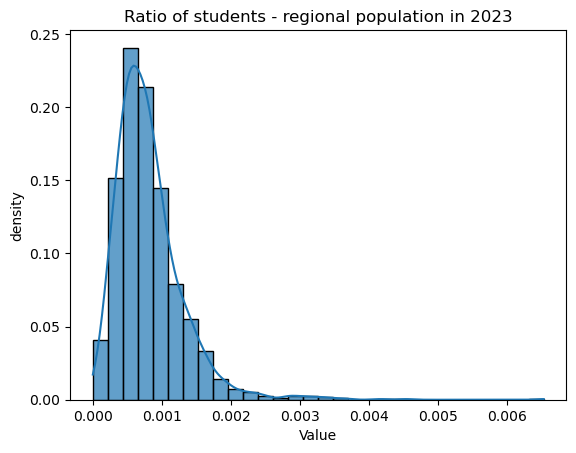

0.0008158605954491901


In [83]:
metric = merged_data.loc[merged_data['조사년도'] == 2023]

metric = metric['학생 비율']

import matplotlib.pyplot as plt
import seaborn as sns


sns.histplot(metric, bins=30, stat = 'probability', kde=True, edgecolor='black', alpha=0.7)

plt.xlabel('Value')
plt.ylabel('density')
plt.title('Ratio of students - regional population in 2023')
plt.show()

print(metric.mean())

### 폐교된 학교들의 마지막 연도 학생 수에 대한 분포

In [50]:
closed = pd.read_csv('D:\DSL\EDA\Data\School_Year/abolishment_mk1.csv', encoding = 'cp949')

columns = ['유초중등학교개황_입학생수', '학교_식별자', '조사년도', '행정구역']
data = closed[columns]

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Monet\AppData\Local\Temp\ipykernel_15392\1647362433.py:1: SyntaxWarning: invalid escape sequence '\D'
  closed = pd.read_csv('D:\DSL\EDA\Data\School_Year/abolishment_mk1.csv', encoding = 'cp949')


In [51]:
pop = pd.read_csv('D:/DSL/EDA/Data/population_filtered_long.csv', encoding = 'cp949')

merged = data.merge(pop, on = ['행정구역', '조사년도'], how = 'left')

print(merged)

     유초중등학교개황_입학생수       학교_식별자  조사년도      행정구역  Unnamed: 0     인구 수
0               15  가천고등학교 (경북)  2009  경상북도 성주군         NaN      NaN
1               30  가천고등학교 (경북)  2010  경상북도 성주군         NaN      NaN
2               27  가천고등학교 (경북)  2011  경상북도 성주군         NaN      NaN
3               19  가천고등학교 (경북)  2012  경상북도 성주군         NaN      NaN
4               19  가천고등학교 (경북)  2013  경상북도 성주군         NaN      NaN
..             ...          ...   ...       ...         ...      ...
213             25  황산고등학교 (전남)  2011  전라남도 해남군         NaN      NaN
214             26  황산고등학교 (전남)  2012  전라남도 해남군         NaN      NaN
215             23  황산고등학교 (전남)  2013  전라남도 해남군         NaN      NaN
216              0  황산고등학교 (전남)  2014  전라남도 해남군       200.0  76981.0
217              0  황산고등학교 (전남)  2015  전라남도 해남군       458.0  76194.0

[218 rows x 6 columns]


#### 폐교에 대한 추가 인구 데이터 전처리

In [54]:
import pandas as pd

df = pd.read_csv('D:/DSL/EDA/Data/11_13_pop.csv', encoding = 'cp949')

new = df.loc[:, df.columns.str.contains('총인구수')]
main = df['행정구역'].str.replace(r"\s*\(\d+\)", "", regex=True)

new.columns = new.columns.str.extract(r"(\d{4})")[0]
new.columns = new.columns.astype(int)

cleared_df = pd.concat([main, new], axis = 1)
cleared_df = cleared_df[cleared_df['행정구역'].str.split().str.len() >= 2]

cleared_df = cleared_df.melt(id_vars = ['행정구역'], var_name = '조사년도', value_name = '인구 수')
cleared_df = cleared_df.dropna()

cleared_df['인구 수'] = cleared_df['인구 수'].str.replace(',','').astype(int)
cleared_df.to_csv('D:/DSL/EDA/Data/11_13_preprocessed.csv', encoding = 'cp949')

pop = pd.read_csv('D:/DSL/EDA/Data/population_filtered_long.csv', encoding = 'cp949')

total = pd.concat([cleared_df, pop], axis = 0, ignore_index = True)

total = total.drop(['Unnamed: 0'], axis = 1)
total.to_csv('D:/DSL/EDA/Data/11_23_pop.csv', sep = ',', encoding = 'cp949')

In [95]:
condition = (cleared_df['행정구역'] == '전라남도 해남군') & (cleared_df['조사년도'] == 2013)
li = [cleared_df[condition]['인구 수']]

print(li)

[736    77684
Name: 인구 수, dtype: int64]


In [111]:
# 1) 도로명 주소에서 시군구 단위 추출
def extract_region(address):
    if "구" in address:  # 광역시의 구 단위 (ex. 서울 강남구)
        if address.split()[0] in ['경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도']:
            return " ".join(address.split()[:3])
        else:
            return " ".join(address.split()[:2])
    elif "시" in address:  # 도 단위의 시 (ex. 경기도 의왕시)
        return " ".join(address.split()[:2])
    else:
        return None  # 처리되지 않는 경우
    
merged = data.merge(total, on = ['행정구역', '조사년도'], how = 'left')

merged = merged.dropna()

merged['인구 비'] = merged['유초중등학교개황_입학생수'] / merged['인구 수']

merged['조사년도'] = merged['조사년도'].astype(int)

### 폐교에 대해 인구 비의 분포 그리기

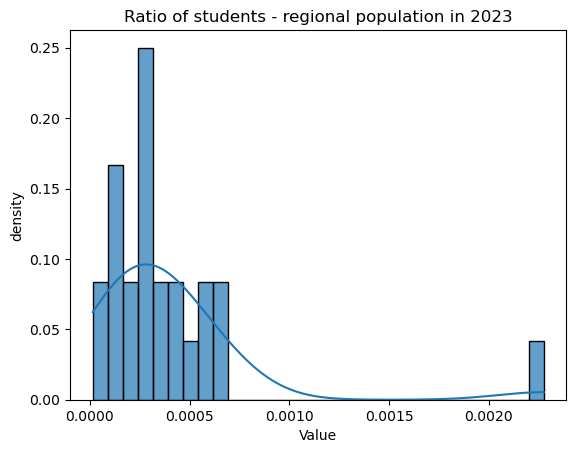

0.000394668015368037


In [117]:
import numpy as np

merged = merged.loc[merged['유초중등학교개황_입학생수'] != 0]
school_group = merged.groupby('학교_식별자')
school_name = sorted(list(set(merged['학교_식별자'])))

school_max_year = school_group['조사년도'].max()

max_year = np.array(school_max_year)

li = []

for name, year in zip(school_name, max_year):
    condition = (merged['학교_식별자'] == name) & (merged['조사년도'] == year)
    li.append(merged[condition]['인구 비'].item())


sns.histplot(li, bins=30, stat = 'probability', kde=True, edgecolor='black', alpha=0.7)

plt.xlabel('Value')
plt.ylabel('density')
plt.title('Ratio of students - regional population in 2023')
plt.show()

li_arr = np.array(li)
print(li_arr.mean())

### 두 분포를 비교하는 그래프 그리기

In [ ]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

# 첫 번째 분포 히스토그램 + KDE
sns.histplot(metric, bins=30, stat="probability", kde=True, color="blue", alpha=0.6, label="Distribution 1")

# 두 번째 분포 히스토그램 + KDE
sns.histplot(li_arr, bins=10, stat="probability", kde=True, color="green", alpha=0.6, label=" 2")

# 첫 번째 분포 평균 표시
plt.axvline(x=np.mean(metric), color='red', linestyle='--', label='Mean of Distribution 1')

# 두 번째 분포 평균 표시
plt.axvline(x=np.mean(li_arr), color='red', linestyle='-', label='Mean of Distribution 2')

# 그래프 꾸미기
plt.xlabel("Ratio of the number of students and the regional population")
plt.ylabel("Probability")
plt.title("Comparison of Two Distributions")
plt.legend()

# 그래프 출력
plt.show()

NameError: name 'plt' is not defined

In [123]:
from scipy.stats import ks_2samp

# KS Test 수행
stat, p_value = ks_2samp(metric, li_arr)

print(f"KS Test Statistic: {stat:.4f}")
print(f"p-value: {p_value}")

# 결과 해석
if p_value > 0.05:
    print("두 분포는 동질성을 가진다. (귀무가설 채택)")
else:
    print("두 분포는 동질성을 가지지 않는다. (귀무가설 기각)")


KS Test Statistic: 0.5698
p-value: 8.660398662097821e-08
두 분포는 동질성을 가지지 않는다. (귀무가설 기각)


In [124]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U Test 수행
stat, p_value = mannwhitneyu(metric, li_arr, alternative='two-sided')

print(f"Mann-Whitney U Test Statistic: {stat:.4f}")
print(f"p-value: {p_value}")

# 결과 해석
if p_value > 0.05:
    print("두 분포는 동질성을 가진다. (귀무가설 채택)")
else:
    print("두 분포는 동질성을 가지지 않는다. (귀무가설 기각)")


Mann-Whitney U Test Statistic: 35196.0000
p-value: 1.7892411298715322e-08
두 분포는 동질성을 가지지 않는다. (귀무가설 기각)
